# EDA (Exploratory Data Analysis) of the dataset

In this notebook, explore the Abalone dataset, by showing relevant visualizations that help understand the problem you are modelling.

Please make sure to write down your conclusions in the final notebook and to remove these intructions.

# Imports

In [13]:
%load_ext autoreload
%autoreload 2

import pandas as pd

pd.set_option("display.max_columns", 500)

import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data

In [6]:
df = pd.read_csv("../data/abalone.csv")

# EDA

In [7]:
# Display the first few rows of the dataset to understand the structure
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
# Check for missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
# Summary statistics of the dataset
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


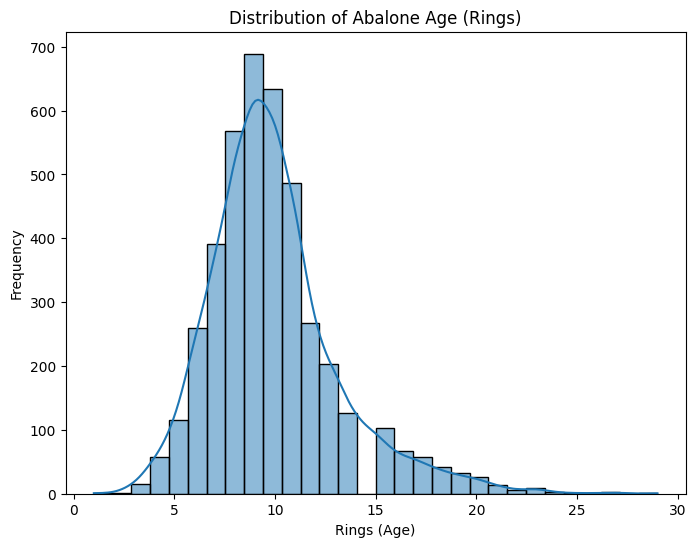

In [14]:
# Distribution of the target variable ('Rings' as an indicator of age)
plt.figure(figsize=(8, 6))
sns.histplot(df["Rings"], kde=True, bins=30)
plt.title("Distribution of Abalone Age (Rings)")
plt.xlabel("Rings (Age)")
plt.ylabel("Frequency")
plt.show()

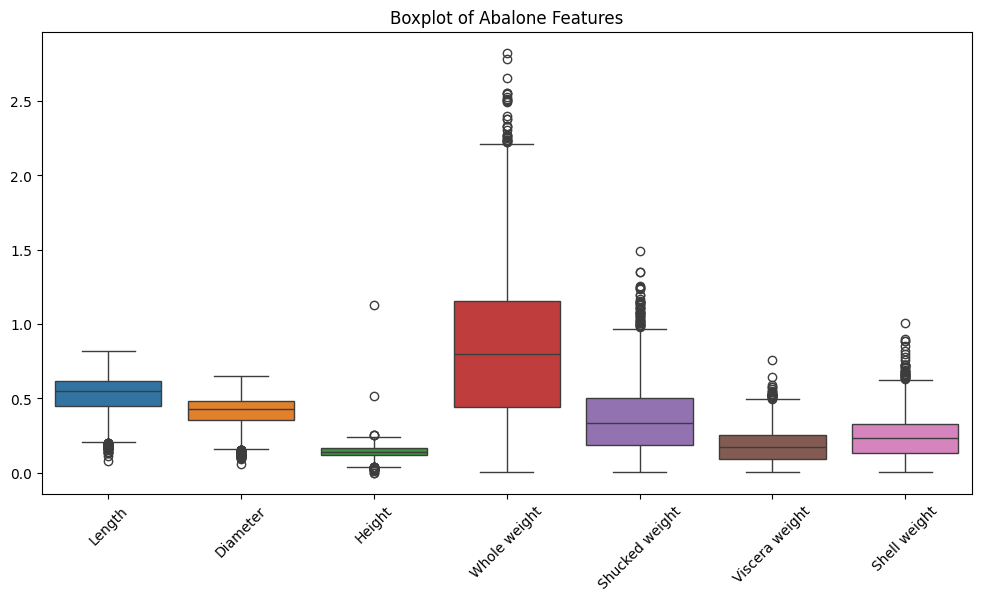

In [15]:
# Boxplot to observe outliers in numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop("Rings", axis=1))
plt.title("Boxplot of Abalone Features")
plt.xticks(rotation=45)
plt.show()

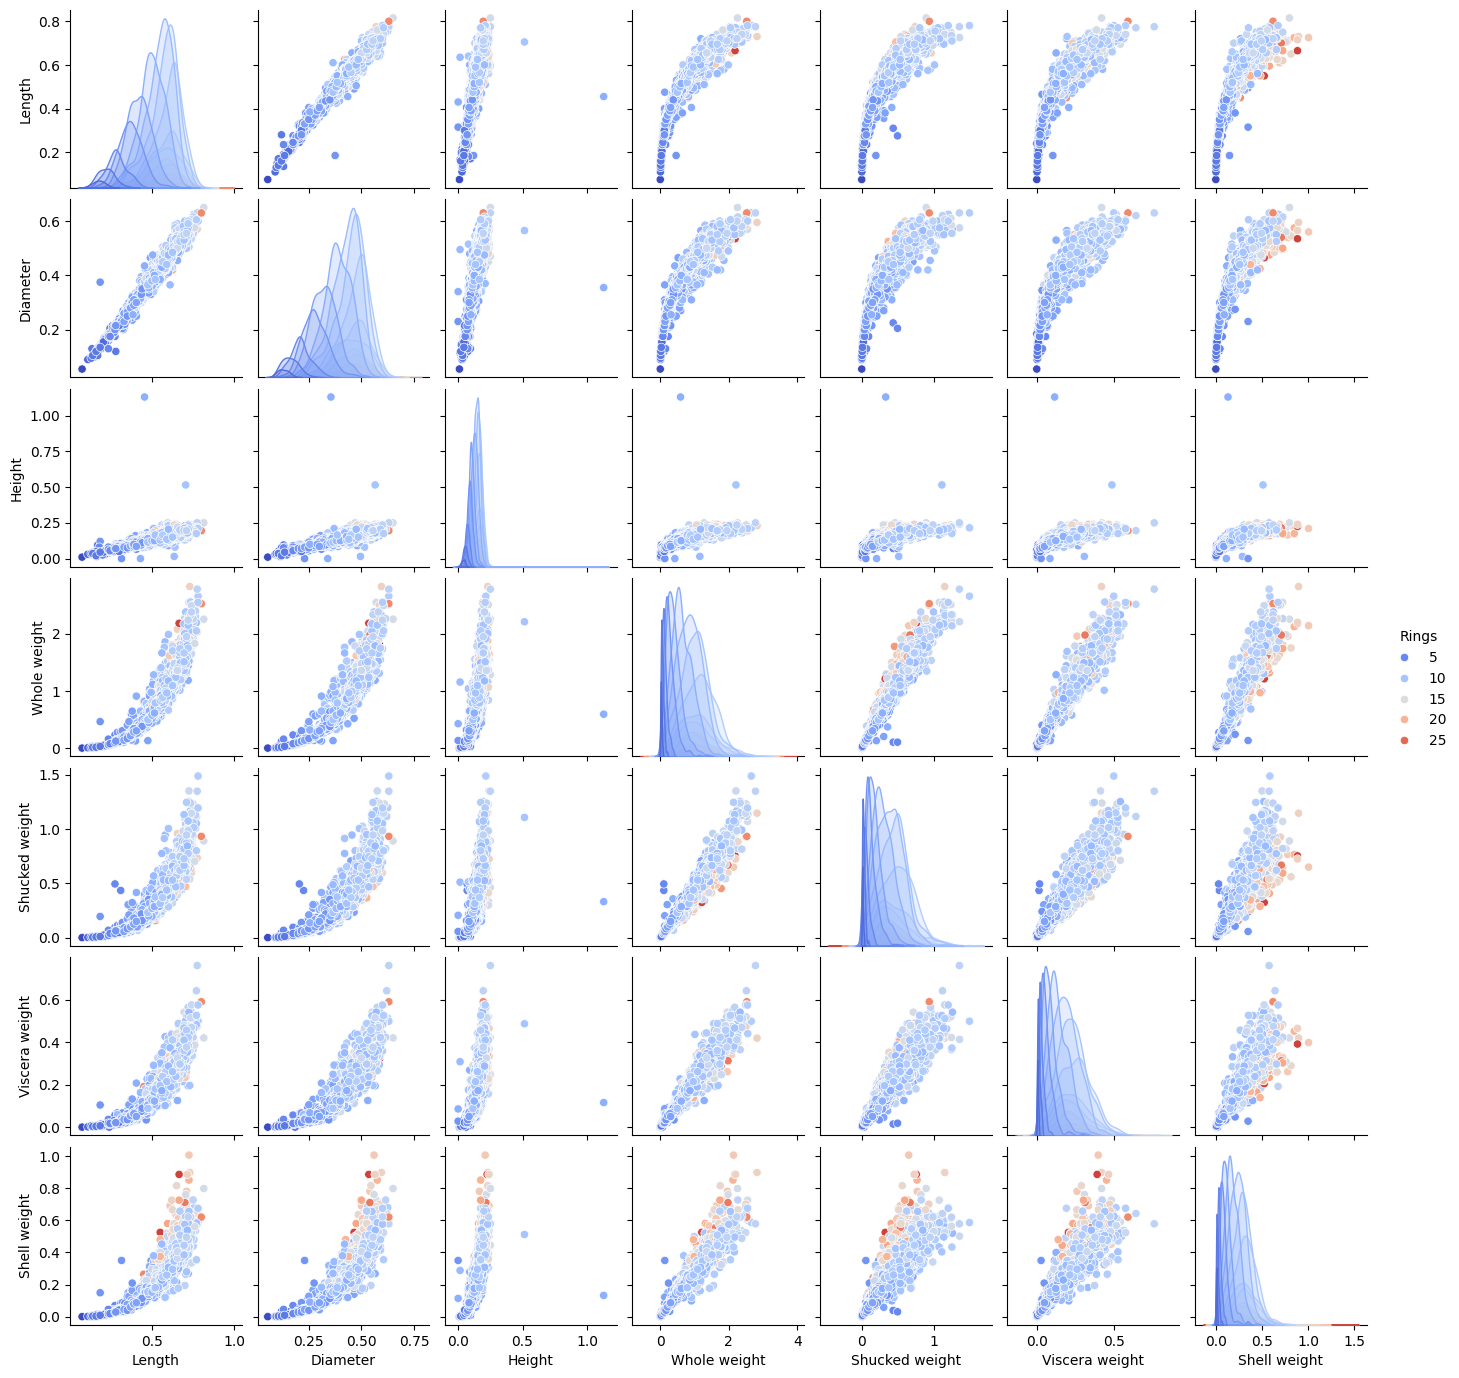

In [16]:
# Pairplot to visualize relationships between features and the target variable
sns.pairplot(df, hue="Rings", palette="coolwarm", diag_kind="kde", height=2)
plt.show()

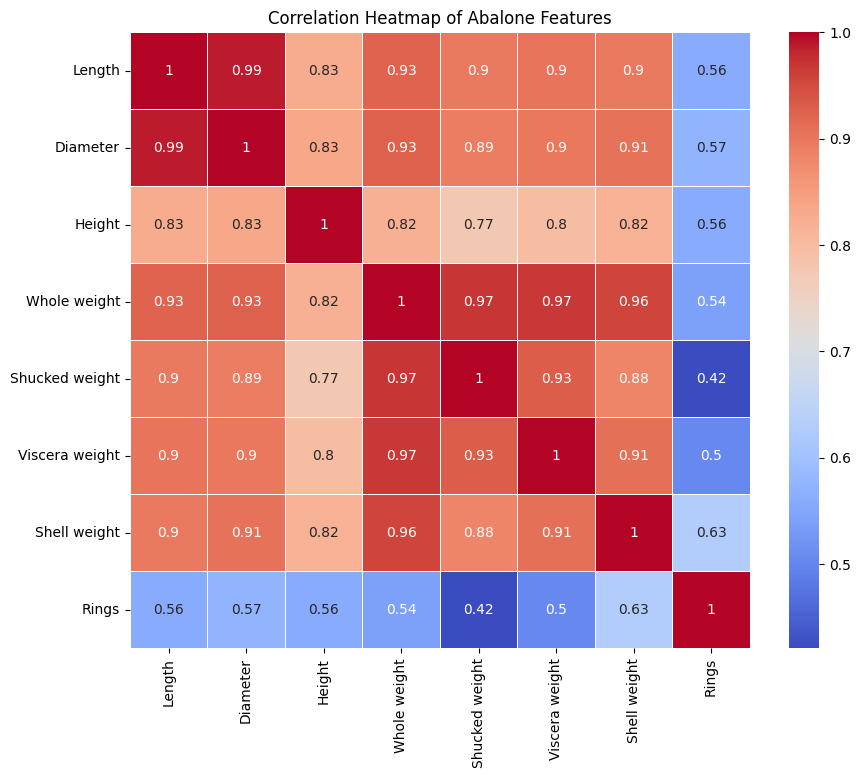

In [19]:
# Exclude the 'Sex' column or any other categorical column for correlation calculation
df_numeric = df.select_dtypes(include=["float64", "int64"])

# Correlation heatmap to identify relationships between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Abalone Features")
plt.show()

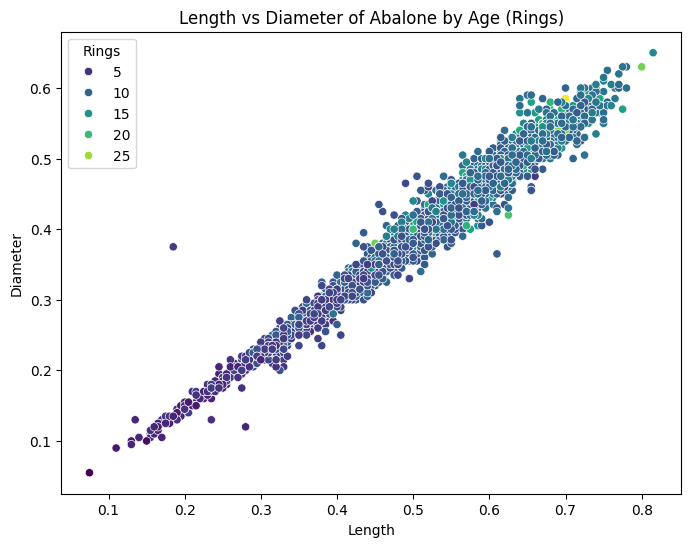

In [18]:
# Explore relationships between some key features (example: Length vs Diameter)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Length", y="Diameter", hue="Rings", palette="viridis")
plt.title("Length vs Diameter of Abalone by Age (Rings)")
plt.xlabel("Length")
plt.ylabel("Diameter")
plt.show()

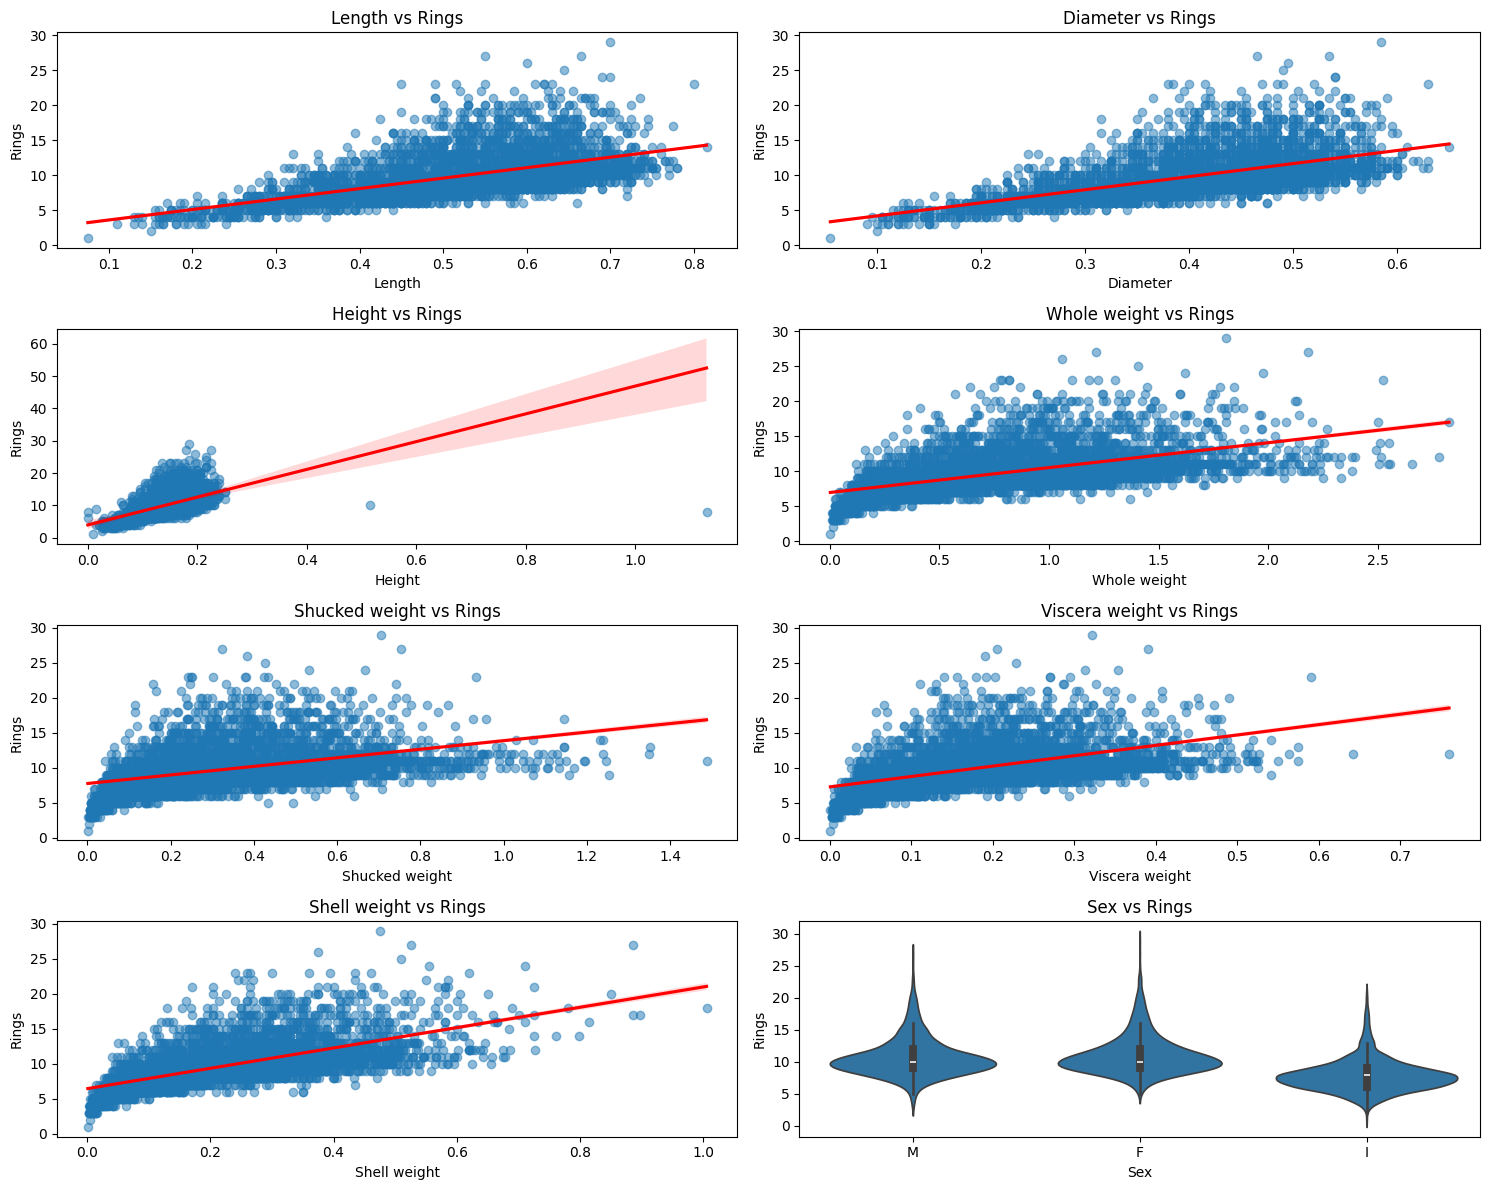

In [22]:
# Identify continuous and categorical features
continuous_features = [
    "Length",
    "Diameter",
    "Height",
    "Whole weight",
    "Shucked weight",
    "Viscera weight",
    "Shell weight",
]
categorical_feature = "Sex"

# Plot continuous features against 'Rings'
plt.figure(figsize=(15, 12))
for i, feature in enumerate(continuous_features):
    plt.subplot(4, 2, i + 1)
    sns.regplot(
        x=feature,
        y="Rings",
        data=df,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red"},
    )
    plt.title(f"{feature} vs Rings")
    plt.xlabel(feature)
    plt.ylabel("Rings")

# Plot categorical feature (Sex) against 'Rings' using violin plot
plt.subplot(4, 2, len(continuous_features) + 1)
sns.violinplot(x=categorical_feature, y="Rings", data=df)
plt.title(f"{categorical_feature} vs Rings")
plt.xlabel(categorical_feature)
plt.ylabel("Rings")

plt.tight_layout()
plt.show()